In [1]:
import time
begin_start_time = time.time()
time_str = time.strftime('%Y-%m-%d %H-%M-%S', time.localtime(begin_start_time))
print(time_str)

2025-11-25 18-22-27


In [2]:
import torch, pandas as pd, os
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", DEVICE)

Device: cuda


In [3]:
from PPO.ppo_agent_eval import head_to_head, plot_winrate_bar
from pprint import pprint
import matplotlib.pyplot as plt
from DQN.h2h_to_excel import append_h2h_to_excel

In [4]:
### classic 
#A = "Connect4 PPQ model.pt"

B= "DIST_XIII" 

### interims

#### special

# best reference
A= "RND_36"

####
GAMES = 1000
res = head_to_head(A, B, n_games=GAMES, device=DEVICE,  opening_noise_k=1, seed=666, progress=True)

RND_36 vs DIST_XIII:   0%|          | 0/1000 [00:00<?, ?it/s]

In [5]:
pprint(res)
print(f"\nA score = {res['A_score_rate']:.3f}  (95% CI {res['A_score_CI95'][0]:.3f}–{res['A_score_CI95'][1]:.3f})")

{'A_losses': 487,
 'A_path': 'RND_36',
 'A_score_CI95': (0.4820046538802826, 0.5439953461197174),
 'A_score_rate': 0.513,
 'A_wins': 513,
 'B_path': 'DIST_XIII',
 'draws': 0,
 'games': 1000}

A score = 0.513  (95% CI 0.482–0.544)


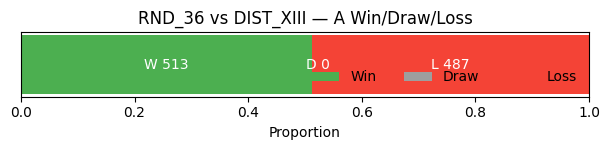

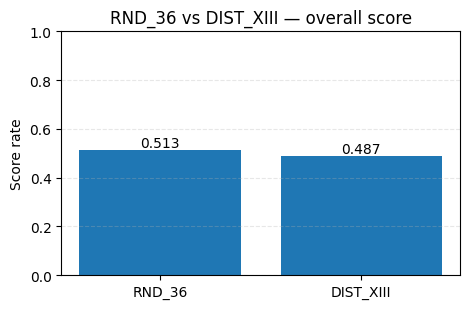

In [6]:
plot_winrate_bar(res)

In [7]:
append_h2h_to_excel(res)

In [8]:
end_time = time.time()
total_elapsed = (end_time - begin_start_time) / 60
print(f"Evaluation completed in {total_elapsed:.1f} minutes")

Evaluation completed in 0.4 minutes
